## Estadística Aplicada

Sesion 12 - 11 sep


Paulina Quiroz Sánchez 1723927

Grupo 41

In [2]:
##librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#librerias especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test


In [4]:
## importar los datos
ejercicio_km= pd.read_excel('ejercicio_km.xlsx')

In [5]:
ejercicio_km.head()

,individuos,tiempo,evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [6]:
## estimar el modelo de kaplan meier
km1 = KaplanMeierFitter().fit(ejercicio_km['tiempo'], ejercicio_km['evento'])

In [7]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


<Axes: xlabel='timeline'>

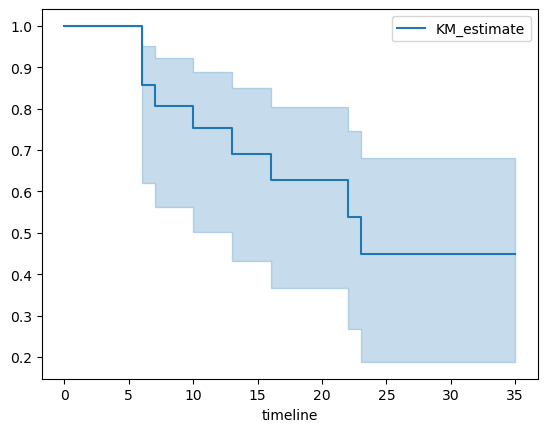

In [10]:
km1.plot_survival_function()

In [11]:
km1.median_survival_time_

23.0

El 23 es la mediana, siginica que hasta ahi se han acumulado la mitad de las observaciones.

Significa que en el tiempo 23 a la mitad de los individuos les ha ocurrido el evento.


In [12]:
## datos
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [13]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


Los datos de "relacion" corresponden al tipo de supervivencia de una relación, el tiempo que pasa desde que inicia la relación hasta que termina. El tiempo está medido en semanas y está en la columna "t". En la variable "estado" 1 significa que el evento ocurrió, y 0 que hay censura.En la variable tratamiento 1 es "detallista" y 0 "no detallista". En esta base detallista es quien hizo por lo menos un regalo semanal a su pareja (flores, peluche, paleta, etc).

In [15]:
## realizar el estimador de kaplan-meier
km_all = KaplanMeierFitter().fit(relacion['t'], relacion['estado'])


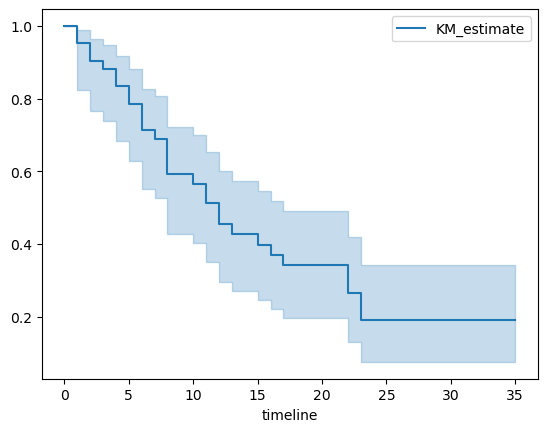

In [16]:
km_all.plot_survival_function();

In [17]:
km_all.median_survival_time_

12.0

En la semana 12 la mitad de las relaciones han terminado. (o al revés, que se han mantenido)

In [18]:
## separar detallistas y no detallistas
detallistas = relacion.query('tratamiento==1')
no_deta = relacion.query('tratamiento==0')

In [20]:
## estimar el modelo
km_deta = KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_nodeta = KaplanMeierFitter().fit(no_deta['t'],no_deta['estado'])

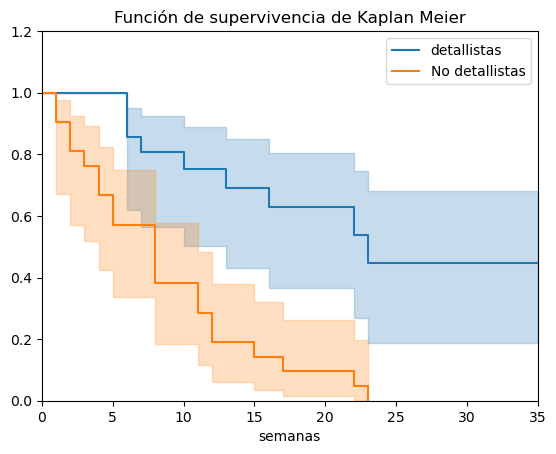

In [22]:
km_deta.plot_survival_function(label='detallistas')
km_nodeta.plot_survival_function(label='No detallistas')
plt.xlim(0,35)
plt.ylim(0,1.2)
plt.xlabel('semanas')
plt.title('Función de supervivencia de Kaplan Meier')
plt.show()

Pruba de hipótesis (log rank test) \
$Ho: S(1)=S(2)$ funciones de supervivencia
iguales\
$Ha: S(1)\neq S(2)$ funciones de supervivencias distintas

In [24]:
## grupo1 detallistas
#LRT = logrank_test(tiempog1, tiempog2, eventog1, eventog2)
LRT = logrank_test(detallistas['t'], no_deta['t'], detallistas['estado'], no_deta['estado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [25]:
LRT.p_value.round(2)

0.0

Con un $\alpha=0.05$ Rechazamos Ho, Las funciones de supervivencia son distintas, La relación de los detallistas dura más que la relación de los no detallistas. La mitad de las relaciones de los no detallistas duran menos de 8 semanas vs la mitad de las relaciones de los detallistas duran 23 semanas.

In [26]:
km_deta.median_survival_time_

23.0

In [27]:
km_nodeta.median_survival_time_

8.0